<h1 style="background-color: lightblue; color: darkblue; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold;">Time Series Forecasting: Exploratory Data Analysis</h1>



# <span style="color:darkblue; font-size:30px;"><b>Introduction</b></span>

Time series data is a sequence of data points collected or recorded at specific time intervals. This type of data is ubiquitous and can be found in various domains such as finance, weather forecasting, economics, and engineering. The primary goal of time series analysis is to understand the underlying patterns, trends, and seasonal variations in the data to make informed predictions and decisions.

Time series forecasting involves using historical data to predict future values. It requires a thorough understanding of the data's temporal dynamics, including trends, seasonality, and cyclical patterns. **Exploratory Data Analysis (EDA)** is a critical first step in the time series forecasting process, as it helps uncover these patterns and provides valuable insights into the data's structure and behavior.

# <span style="color:darkblue; font-size:20px;"><b>Data</b></span>

In this notebook, I will use the **Energy Consumption Dataset**, which contains PJM (AEP)'s hourly energy consumption data in megawatts over nine years.

# <span style="color:darkblue; font-size:20px;"><b>Exploratory Data Analysis (EDA)</b></span>


The EDA for time series data can be broken down into **six key steps**:

**Data Exploration**: This step involves summarizing the basic features of the data, such as mean, median, variance, and standard deviation. It provides a quick overview of the data's central tendency and variability.

**Time Plot**: A time plot visualizes the data points over time, making it easier to identify trends, patterns, and anomalies. This plot is essential for understanding the overall behavior of the time series.

**Seasonal Plots**: Seasonal plots help in visualizing the seasonal patterns within the data. By decomposing the time series into seasonal components, we can better understand periodic fluctuations.

**Box Plots**: Box plots are useful for detecting outliers and understanding the distribution of data. They provide a visual summary of the data's range, quartiles, and any potential outliers.

**Time Series Decomposition**: This technique involves breaking down the time series into its constituent components, such as trend, seasonality, and residuals. It helps in isolating the underlying patterns and making more accurate forecasts.

**Lag Analysis**: Lag analysis examines the relationship between current and past values of the time series. It helps in identifying autocorrelation and the potential for using past values to predict future values.

By following these steps, we can gain a comprehensive understanding of the time series data, uncover hidden patterns, and prepare it for accurate forecasting. Let's dive into each of these steps in detail.


<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Imports
</span>

# <span style="color:red; font-size:20px;">Importing packages</span>

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# <span style="color:red; font-size:20px;"> Loading the dataset</span>

In [19]:
import os
import kagglehub

# Download the dataset (it will go to cache)
path = kagglehub.dataset_download("raminhuseyn/energy-consumption-dataset")

print("Dataset downloaded to:", path)

# List files in the directory
files = os.listdir(path)
print("Files in dataset:", files)

# Read the CSV file
csv_files = [f for f in files if f.endswith('.csv')]

if csv_files:
    csv_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_path)
    print(f"\nLoaded: {csv_files[0]}")

Dataset downloaded to: C:\Users\User\.cache\kagglehub\datasets\raminhuseyn\energy-consumption-dataset\versions\1
Files in dataset: ['PJM(AEP)_energy_dataset.csv']

Loaded: PJM(AEP)_energy_dataset.csv


<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Step 1: Data exploration
</span>

In [20]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [21]:
# Setting the 'Datetime' column as the index of the DataFrame
df = df.set_index('Datetime')

# Ensuring that the index is of datetime type
df.index = pd.to_datetime(df.index)
# Generating descriptive statistics of the DataFrame
df.describe()


,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Step 2: Time plot
</span>

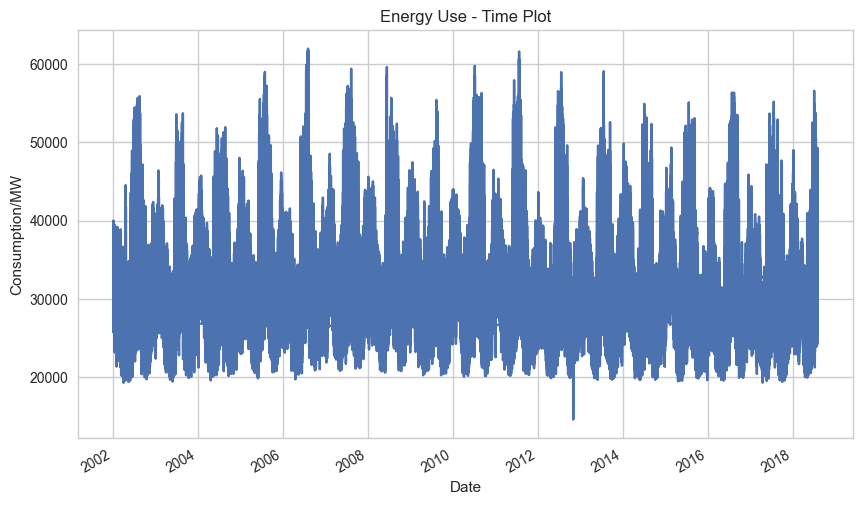

In [29]:
# Setting pyplot style
plt.style.use("seaborn-v0_8-whitegrid")

# Plotting time series
plt.figure(figsize=(10,6))
df['PJME_MW'].plot(title='Energy Use - Time Plot')
plt.ylabel('Consumption/MW')
plt.xlabel('Date')
plt.show()


### Key insights

* The pattern in the data exhibits yearly seasonality, indicating recurring fluctuations in consumption over the course of each year.
 
* Contrarily, the series does not display a clear trend of increasing or decreasing consumption over the years. Instead, the average consumption remains relatively constant or stationary.

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Step 3: Seasonal Plots
</span>

Creating `new year`, `month`, `week`, `day`, `day_str`, `year_month` features

In order to visualize and pull out seasonal patterns, we need to create some features such as **year, month, week, day, day_str, and year_month.**



In [1]:
# Extracting time-related features

df['year'] = df.index.year
df['month'] = df.index.month
df.reset_index(inplace=True)
df['week'] = df['Datetime'].dt.isocalendar().week
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.dayofweek
df['day_str'] = df['Datetime'].dt.strftime('%a')
df['year_month'] = df['Datetime'].dt.strftime('%Y_%m')
df.set_index('Datetime', inplace=True)


NameError: name 'df' is not defined

In [31]:
df.head()

,PJME_MW,year,month,week,hour,day,day_str,year_month
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,1,1,Tue,2002_12
2002-12-31 02:00:00,25147.0,2002,12,1,2,1,Tue,2002_12
2002-12-31 03:00:00,24574.0,2002,12,1,3,1,Tue,2002_12
2002-12-31 04:00:00,24393.0,2002,12,1,4,1,Tue,2002_12
2002-12-31 05:00:00,24860.0,2002,12,1,5,1,Tue,2002_12


### **3.1 Seasonal plot — Yearly consumption**

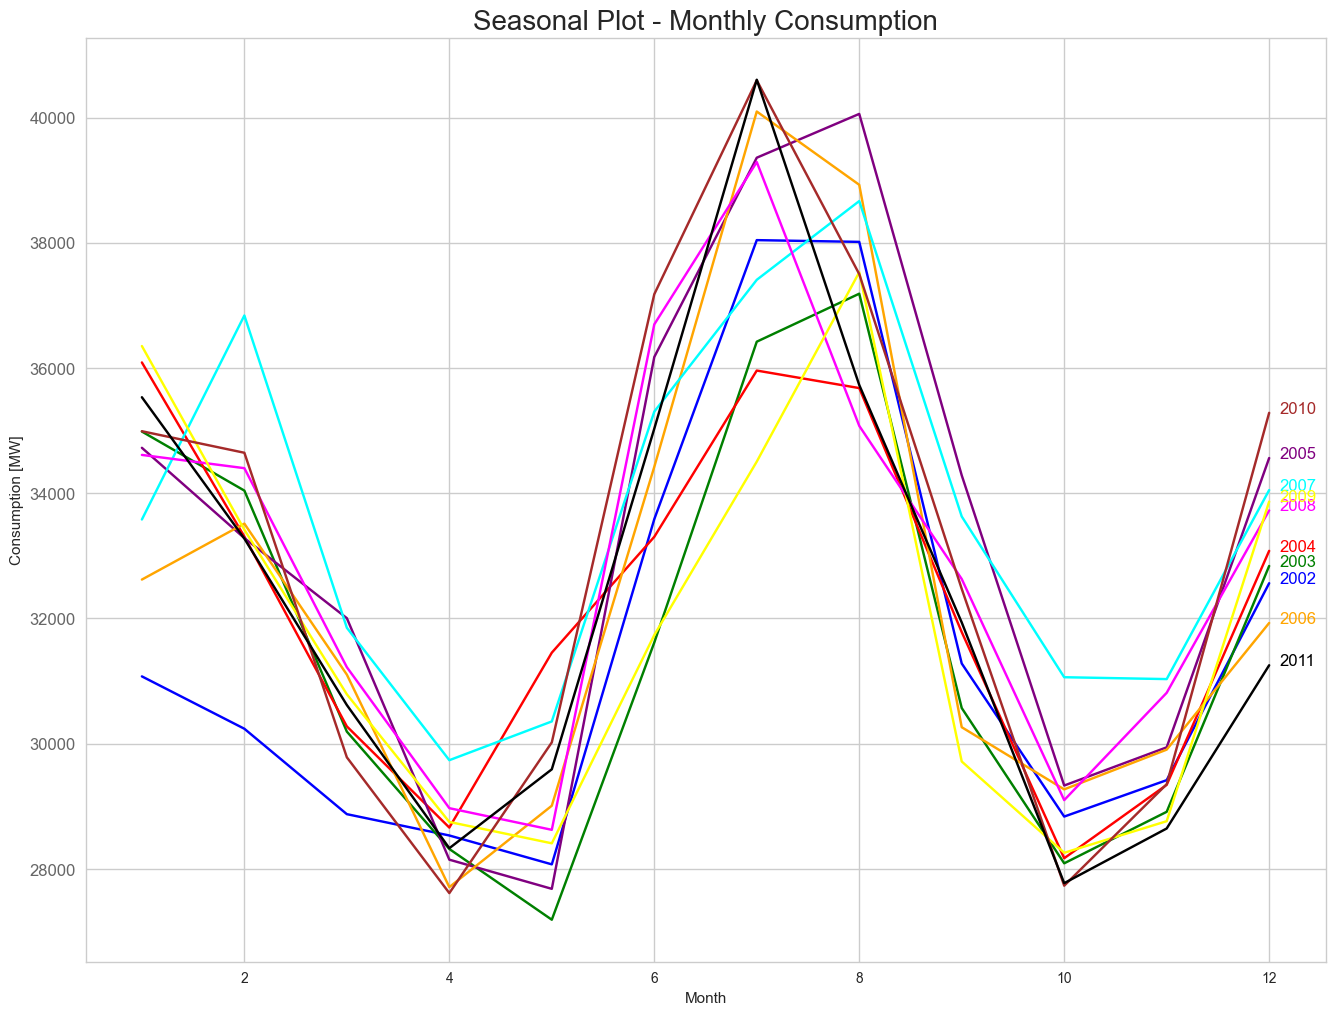

In [32]:
# Defining colors palette
np.random.seed(42)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'black']

# Plotting
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i < len(colors):  # Ensuring we don't exceed the number of available colors
        plt.plot('month', 'PJME_MW', data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])

# Setting labels and titles
plt.gca().set(ylabel= 'PJME_MW', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Month')
plt.show()




### Key insights:

The plot represents the monthly energy consumption over several years. Each line corresponds to a different year, illustrating how consumption fluctuates across months and years.

Consumption increases significantly during winter and peaks in summer, with minima in spring and autumn.

The plot indicates that there isn't a clear pattern of change in overall consumption across the years.

### **3.2 Seasonal plot — Weekly consumption**

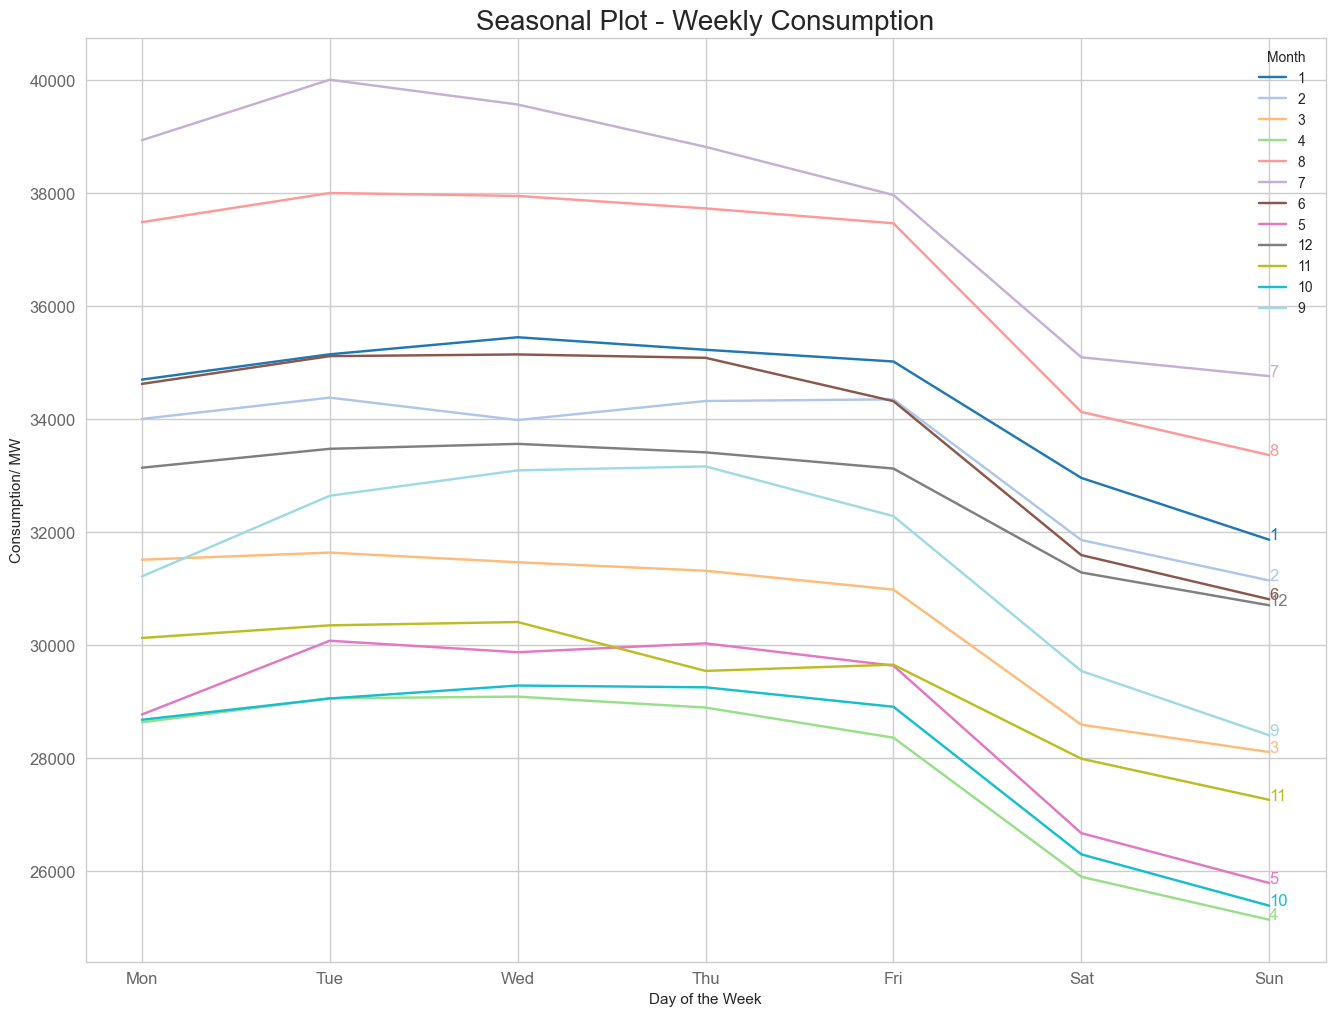

In [33]:
# Preparing the data
np.random.seed(42)
df_plot = df[['month', 'day_str', 'PJME_MW', 'day']].dropna()
df_plot = df_plot.groupby(['day_str', 'month', 'day']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by='day', ascending=True)

# Defining the color palette
months = df_plot['month'].unique()
colors = plt.cm.get_cmap('tab20', len(months)).colors  # Using a colormap from matplotlib

# Plotting
plt.figure(figsize=(16, 12))
for i, month in enumerate(months):
    month_data = df_plot[df_plot['month'] == month]
    plt.plot(month_data['day_str'], month_data['PJME_MW'], color=colors[i], label=month)
    plt.text(len(month_data['day_str']) - 1, month_data['PJME_MW'].iloc[-1], month, fontsize=12, color=colors[i])

# Setting labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Consumption/ MW')
plt.title('Seasonal Plot - Weekly Consumption', fontsize=20)
plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.legend(title='Month')
plt.show()


* The plot shows that weekly consumption peaks on **Thursday** and remains stable until **Friday**. During weekends, the consumption considerably decreases.

* Another pattern is that **July and August** have high energy demand. Additionally, **April, May, and November** have lower consumption levels. This indicates that energy consumption increases during the **hottest months**, suggesting that **cooling system**s consume more energy than **heating systems**.

### 3.3 Seasonal plot — Daily consumption

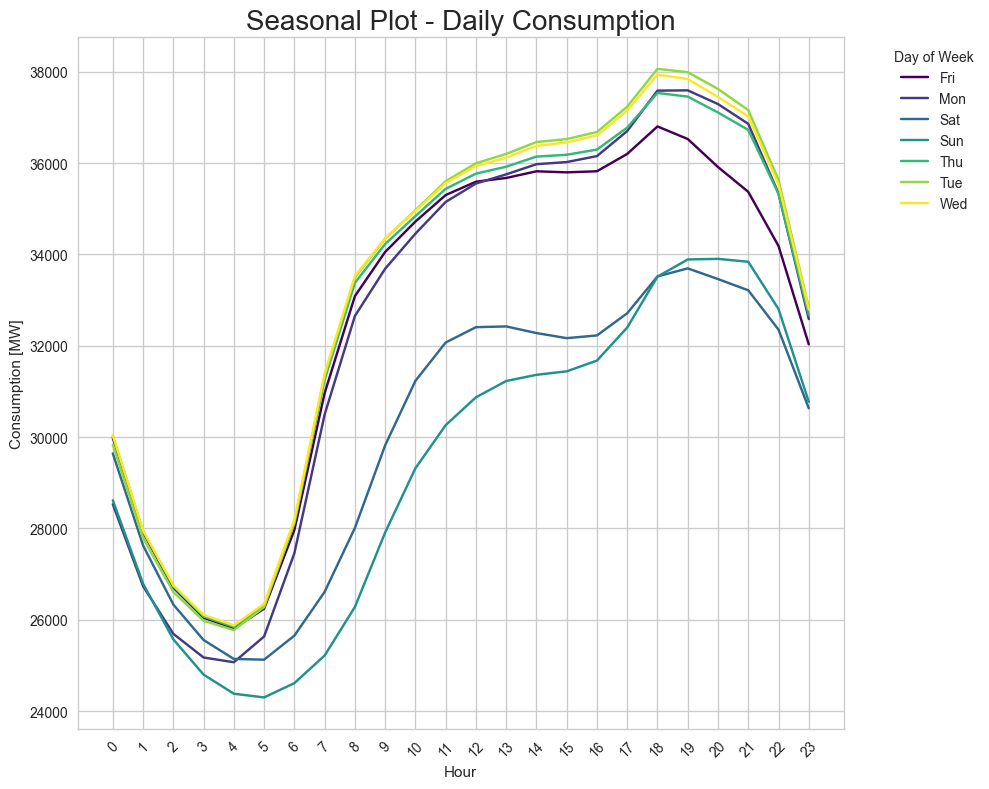

In [34]:
# Preparing the data
df_plot = df[['hour', 'day_str', 'PJME_MW']].dropna()
df_plot = df_plot.groupby(['hour', 'day_str']).mean().reset_index()

# Plotting using Matplotlib directly
plt.figure(figsize=(10, 8))
days = df_plot['day_str'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(days)))

for i, day in enumerate(days):
    day_data = df_plot[df_plot['day_str'] == day]
    plt.plot(day_data['hour'], day_data['PJME_MW'], label=day, color=colors[i])

# Setting x-axis ticks
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)], rotation=45)

# Setting labels and titles
plt.title("Seasonal Plot - Daily Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Key insights from seasonal plots

* **Yearly consumption** does not vary significantly over the years, suggesting the potential use of yearly seasonality features derived from lagged or exogenous variables. 
 
* **Weekly consumption** follows a consistent pattern across months, indicating that weekly features derived from lagged or exogenous variables may be useful.

Lagged variables: Features created from past values, like "consumption from this same week last year" or "consumption from 365 days ago"

Exogenous variables: External factors that influence consumption but aren't part of the consumption data itself (like temperature, holidays, economic indicators)

Derived features: You create new features from these sources to capture yearly patterns (e.g., "average consumption for this month across all years"
 
* **Daily consumption** differs between weekdays and weekends, suggesting the use of categorical features to distinguish between regular weekdays and weekends.

**TLDR**: Use past values and external data to capture yearly patterns, and use category labels (like "weekend" vs "weekday") to capture daily patterns.

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Step 4: Box Plots
</span>




 Boxplots help us identify data distribution. In brief, boxplots depict percentiles, including the first quartile (Q1), median (Q2), and third quartile (Q3) of a distribution. The whiskers represent the range of the data, providing insight into its variability. Values beyond the whiskers can be considered outliers.

#### Total consumption

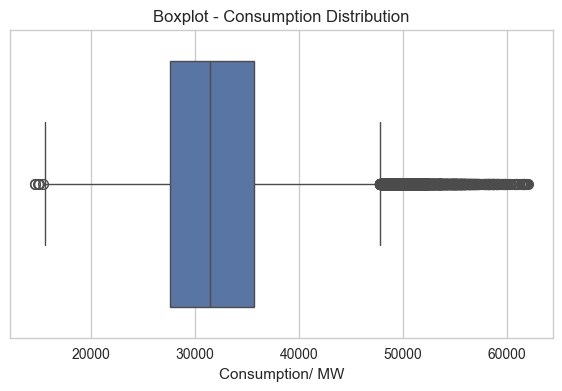

In [35]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='PJME_MW')
plt.xlabel('Consumption/ MW')
plt.title(f'Boxplot - Consumption Distribution')

#### Day month distribution

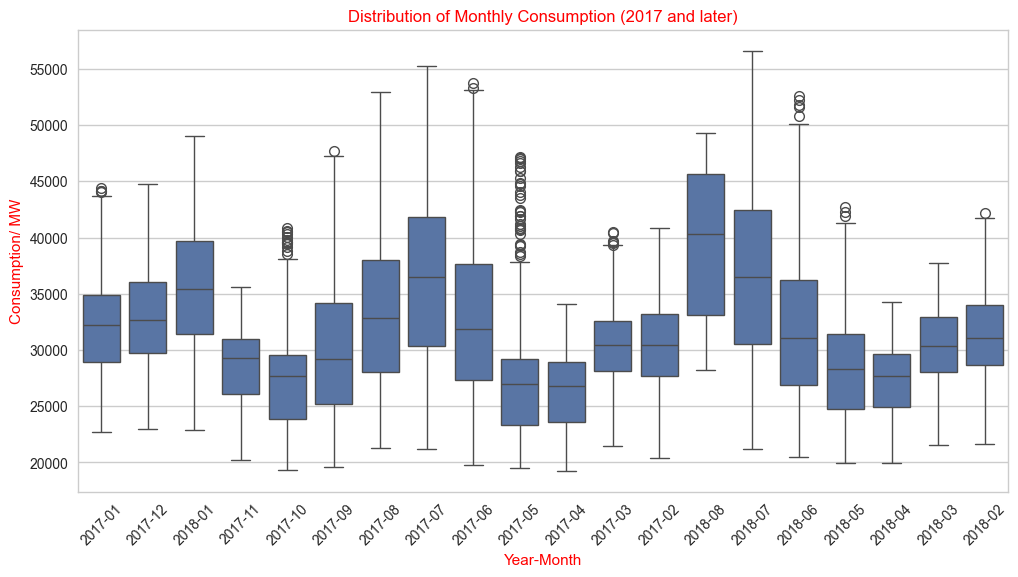

In [36]:
# Extracting year and month features
df['year'] = df.index.year
df['month'] = df.index.month
df['year_month'] = df.index.strftime('%Y-%m')

# Filtering data for years 2017 and later
df_plot = df[df['year'] >= 2017]

# Plotting boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_month', y='PJME_MW', data=df_plot)
plt.title('Distribution of Monthly Consumption (2017 and later)', color='red')
plt.xlabel('Year-Month', color ='red')
plt.ylabel('Consumption/ MW', color ='red')
plt.xticks(rotation=45)
plt.show()


#### Day distribution

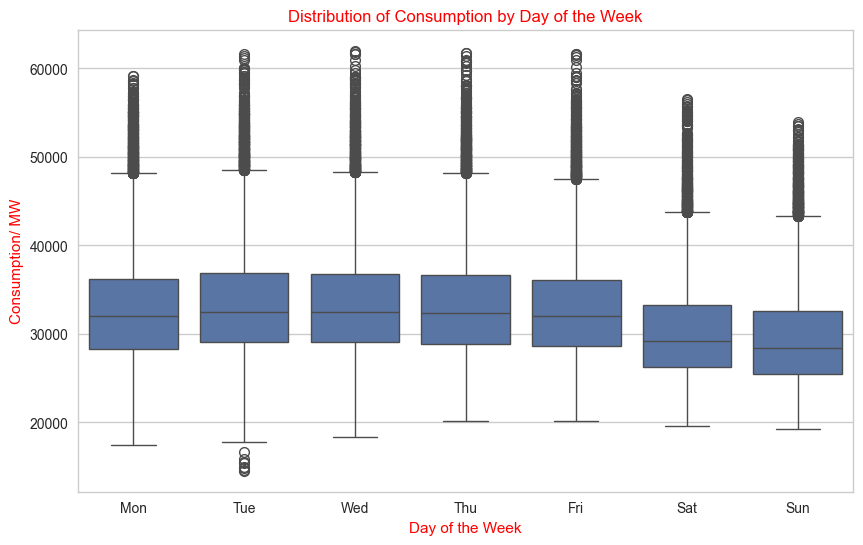

In [37]:
# Sorting the DataFrame by day of the week
df_plot = df[['day_str', 'day', 'PJME_MW']].sort_values(by='day')

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_str', y='PJME_MW', data=df_plot)
plt.title('Distribution of Consumption by Day of the Week', color ='red')
plt.xlabel('Day of the Week', color ='red')
plt.ylabel('Consumption/ MW', color='red')
plt.show()


####  Hour distribution

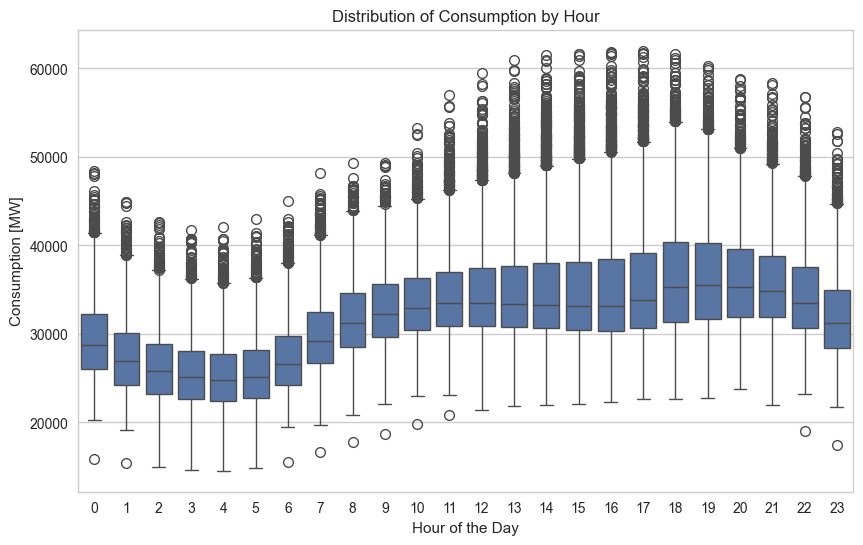

In [38]:
# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hour'], y=df['PJME_MW'])
plt.title('Distribution of Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Consumption [MW]')
plt.show()


<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Step 5: Time Series Decomposition
</span>


A time series can be conceptualized as comprising three primary components: **a trend component, a seasonal component, and a remainder component**, which encompasses any other variability in the time series. In some cases, a time series may exhibit multiple seasonal components, corresponding to different seasonal periods, such as **daily, weekly, monthly, or yearly** cycles.

There are two primary types of decomposition methods: **additive and multiplicative**.

In **additive decomposition**, a series (𝑦) is represented as the sum of a seasonal component (𝑆), a trend component (𝑇), and a remainder (𝑅):

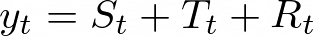

Similarly, **multiplicative decomposition** can be expressed as:

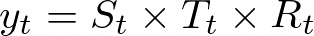

In summary, **additive decomposition** is most suitable for time series with **constant variance**, while **multiplicative decomposition** is better suited for time series with **non-stationary variances**.

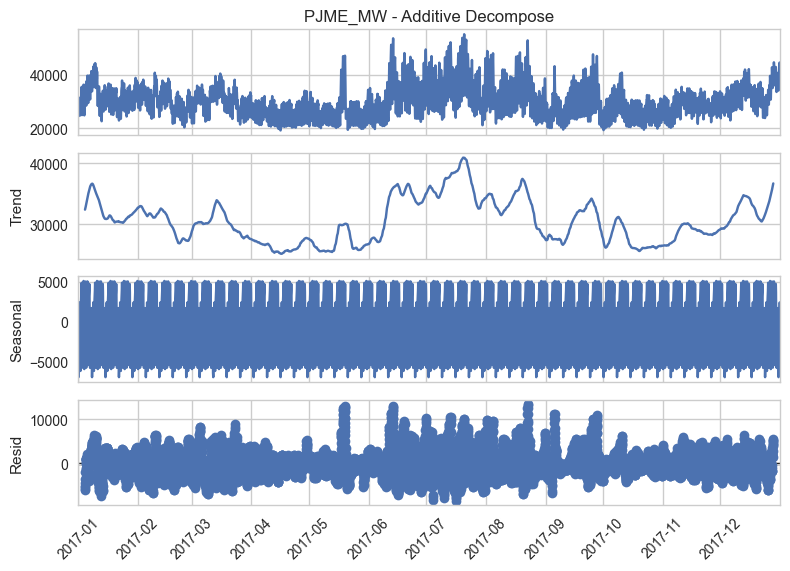

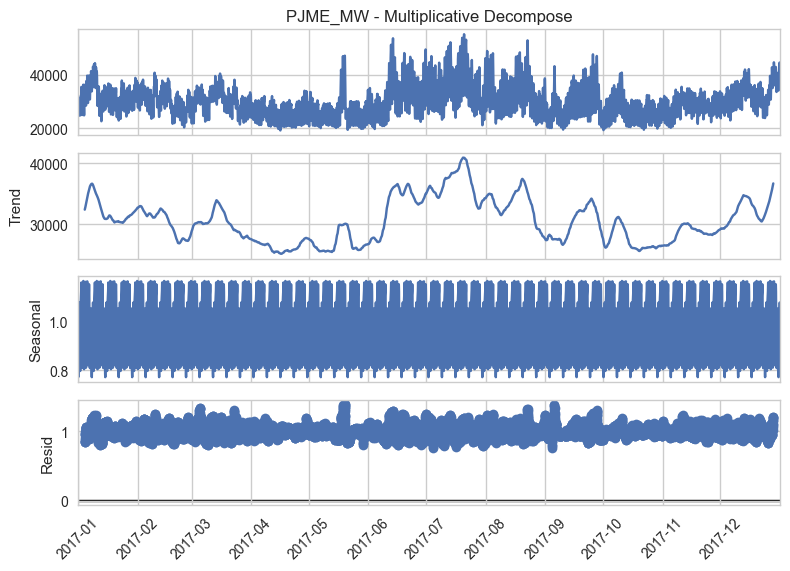

In [39]:
#Importing relevant modules
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtering data for the year 2017 and reset index
df_plot = df[df['year'] == 2017].reset_index()

# Removing duplicate Datetime entries and sort by Datetime
df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')

# Setting Datetime column as index
df_plot = df_plot.set_index('Datetime')

# Copying the 'PJME_MW' column for both additive and multiplicative decompose
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

# Performing additive decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Performing multiplicative decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plotting additive decomposition
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Plotting multiplicative decomposition
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Displaying the plots
plt.show()


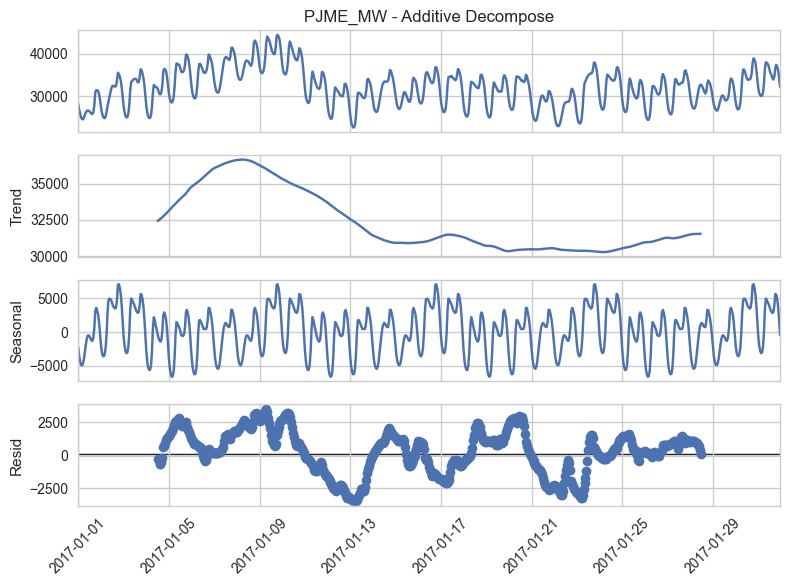

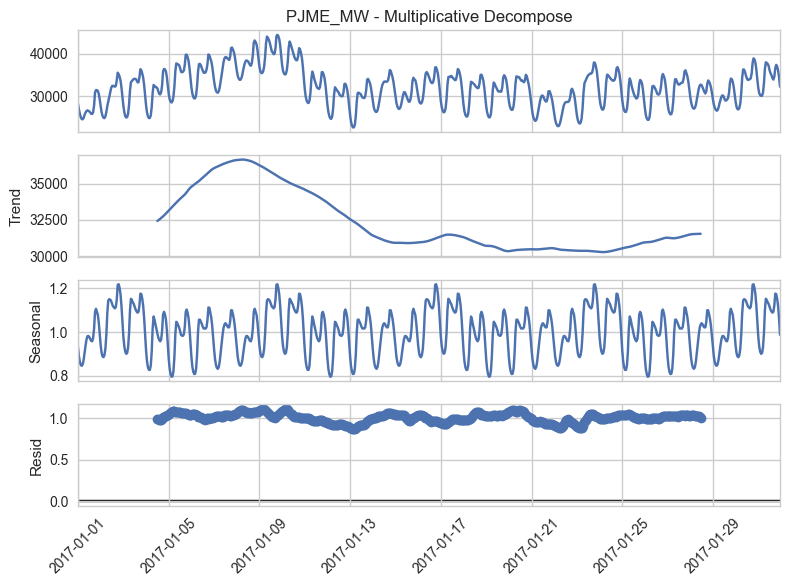

In [40]:
# Filter data for the year 2017 and reset index
df_plot = df[(df['year'] == 2017)].reset_index()

# Filter data for January
df_plot = df_plot[df_plot['month'] == 1]

# Copy the 'PJME_MW' column for both additive and multiplicative decompose
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

# Remove duplicate Datetime entries and sort by Datetime
df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')

# Set Datetime column as index
df_plot = df_plot.set_index('Datetime')

# Perform additive decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Perform multiplicative decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plot additive decomposition
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Plot multiplicative decomposition
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)

# Display the plots
plt.show()


The plots above depict data from the year **2017**. In both instances, we observe a trend with numerous local peaks, particularly during the summer months. Analysis of the seasonal component reveals multiple periodicities within the series. While the plots emphasize the weekly pattern, focusing on a specific month (such as January) of the same year reveals daily seasonality as well.

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:25px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
             border:2px solid yellow;
              padding:15px 30px;">Step 6: Lag Analysis
</span>

In time series forecasting, a lag represents a past value of the series. For instance, in daily series, the first lag corresponds to the value the series had the day before, the second lag to the value from two days ago, and so forth.

Lag analysis involves calculating correlations between the series and a lagged iteration of itself, a concept known as autocorrelation. For a series lagged by k time points, the autocorrelation coefficient is defined as:

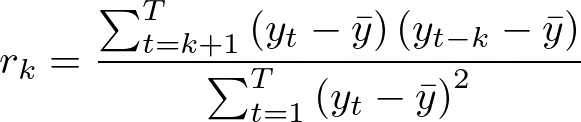


When data exhibits a trend, autocorrelations for small lags typically tend to be large and positive. This is because observations that are close in time also tend to be close in value. In the presence of seasonality, autocorrelation values tend to be larger at seasonal lags (and their multiples) compared to other lags. Data that display both trend and seasonality will manifest a combination of these effects.


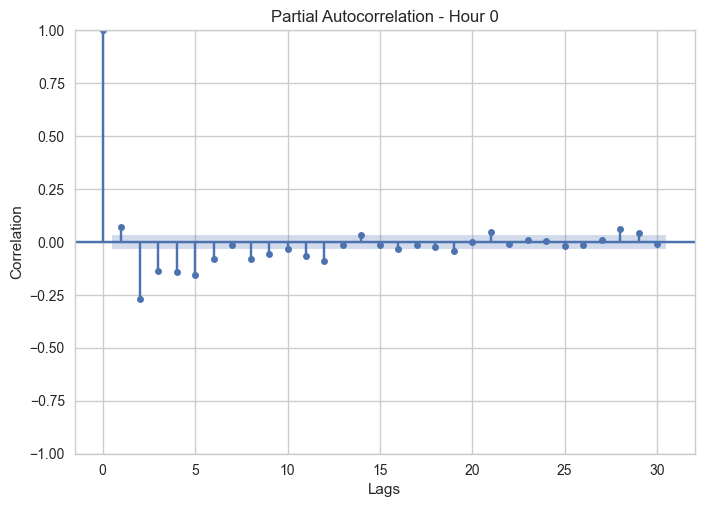

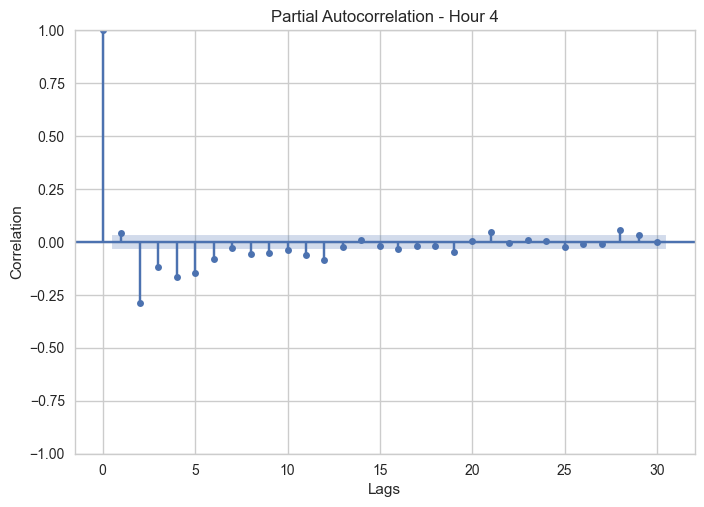

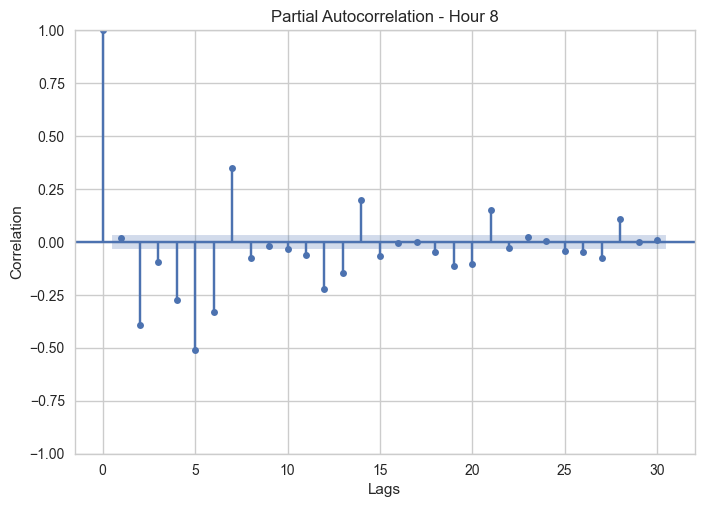

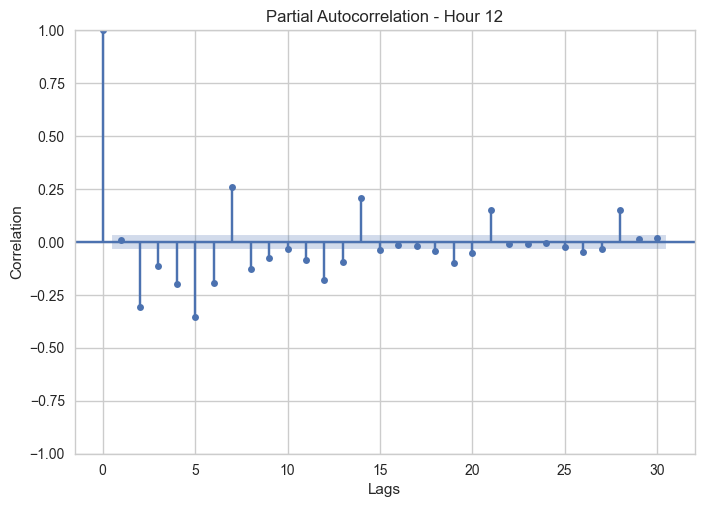

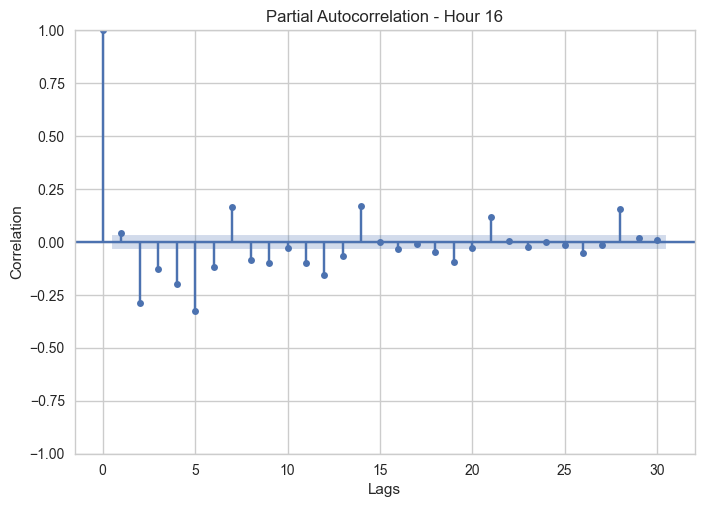

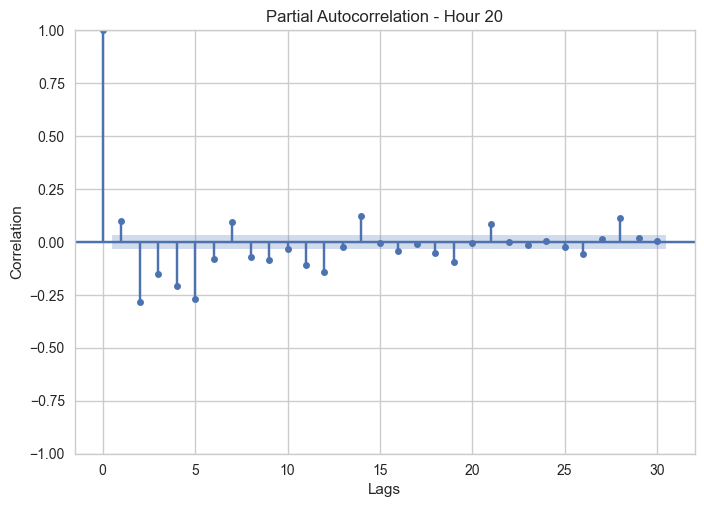

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

actual = df['PJME_MW']
hours_of_interest = range(0, 24, 4)

for hour in hours_of_interest:
    hour_data = actual[actual.index.hour == hour].diff().dropna()
    plot_pacf(hour_data, lags=30, alpha=0.01)
    plt.title(f'Partial Autocorrelation - Hour {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()


## References



1. Brownlee, J. (2018). Deep Learning for Time Series Forecasting. Machine Learning Mastery.

2. Nicolini, M. (2024). Time Series Forecasting: A Practical Guide to Exploratory Data Analysis. [online] Medium. Available at: https://towardsdatascience.com/time-series-forecasting-a-practical-guide-to-exploratory-data-analysis-a101dc5f85b1 [Accessed 18 May 2024].